<a href="https://colab.research.google.com/github/Ak-ash22/proj_gatecrashers/blob/main/qml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.simplefilter("ignore",category=DeprecationWarning)

In [1]:
!pip install qiskit --quiet
!pip install qiskit_algorithms --quiet
!pip install qiskit_machine_learning --quiet
!pip install qiskit_ibm_runtime  --quiet
!pip install QiskitRuntimeService --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 737.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512412 sha256=25abedd21b158e79fd5bbb4c713d0e5caafe7ddf7c7dd80

In [30]:
import time
import pandas as pd
import numpy as np
import qiskit
import matplotlib.pyplot as plt
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, EfficientSU2
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR, QSVR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import clear_output

In [4]:
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [6]:
flat_train = pd.read_csv('train.csv')
flat_test = pd.read_csv('test.csv')

In [7]:
flat_train = flat_train.iloc[:-11905]
flat_test = flat_test.iloc[:-11905]
flat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          101 non-null    float64
 1   town          101 non-null    int64  
 2   flat_type     101 non-null    int64  
 3   block         101 non-null    int64  
 4   latitude      101 non-null    float64
 5   longitude     101 non-null    float64
 6   area_sqm      101 non-null    float64
 7   resale_price  101 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 6.4 KB


In [8]:
train_data = flat_train.drop(['resale_price'],axis=1)
train_labels = flat_train['resale_price']

test_data = flat_test.drop(['resale_price'],axis=1)
test_labels = flat_test['resale_price']

In [9]:
columns = ['year','town','flat_type','block','latitude','longitude','area_sqm']

scaler = MinMaxScaler()
train_data[columns] = scaler.fit_transform(train_data[columns])
train_labels = scaler.fit_transform(train_labels.to_numpy().reshape(-1,1))
test_data[columns] = scaler.fit_transform(test_data[columns])
test_labels = scaler.fit_transform(test_labels.to_numpy().reshape(-1,1))

In [10]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [11]:
#from qiskit_ibm_runtime import Estimator, QiskitRuntimeService, Session

#service = QiskitRuntimeService(
#     channel='ibm_quantum',
#    instance='ibm-q/open/main',
#    token='84e47768480771b0f65f16b3f25447e5ab6b88d174cccb8271d1d0a3e4fdf3ce875e7f9f2612ad64f6f107644f49d8c6d9cd2619469de103753b4ae7556e703a'
#)
#backend = service.backend('ibmq_qasm_simulator')
#estimator = Estimator(backend=backend)

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='<IBM Quantum API key>')

## Using NeuralNetworkRegressor

#### Using QNNCircuit

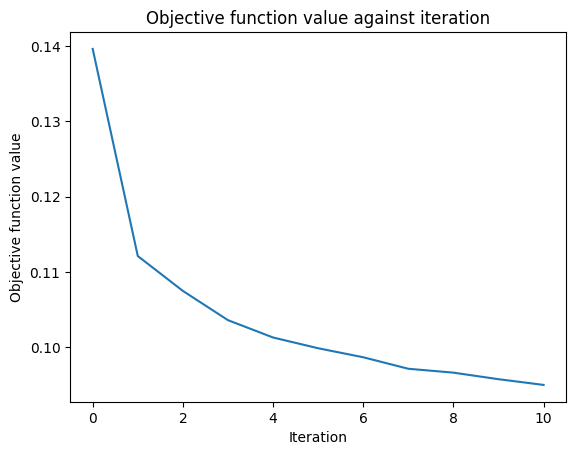

Time taken to fit the model: 3338 seconds
Time taken to predict: 4 seconds
Time taken to get score: 7 seconds


In [12]:
qc = QNNCircuit(num_qubits=7) #number of features

objective_func_vals = []
regression_estimator_qnn = EstimatorQNN(circuit=qc)
regressor = NeuralNetworkRegressor(neural_network=regression_estimator_qnn,
                                   loss='squared_error',
                                   optimizer=L_BFGS_B(maxiter=10),callback=callback_graph)
start_time = time.time()
regressor.fit(train_data,train_labels)
elapsed_time = time.time() - start_time
print(f"Time taken to fit the model for NNR with QNNCircuit: {round(elapsed_time)} seconds")

start_time = time.time()
predicted_test_labels = regressor.predict(test_data)
elapsed_time = time.time() - start_time
print(f"Time taken to predict for NNR with QNNCircuit: {round(elapsed_time)} seconds")

start_time = time.time()
regressor.score(test_data,test_labels)
elapsed_time = time.time() - start_time
print(f"Time taken to get score for NNR with QNNCircuit: {round(elapsed_time)} seconds")
print(f'score for NNR with QNNCircuit : {score}')

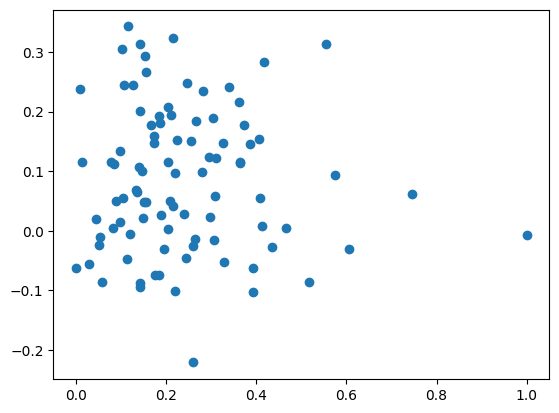

In [13]:
plt.scatter(test_labels,predicted_test_labels)

In [34]:
mae_nnr_qnn = mean_absolute_error(y_true=test_labels,y_pred=predicted_test_labels)
print(f'Mean absolute error for NNR with QNNCircuit :{mae_nnr_qnn}')
print('MSE:', mean_squared_error(test_labels, predicted_test_labels))
print('RMSE:', np.sqrt(mean_squared_error(test_labels, predicted_test_labels)))

Mean absolute error for NNR with QNNCircuit :0.19262030649745537
MSE: 0.06671988764266604
RMSE: 0.2583019311632533


## Using VQR

#### Using RealAmplitudes ansatz

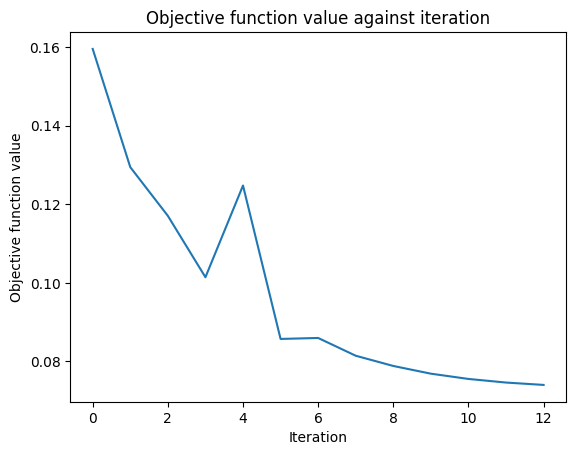

Time taken to fit using VQR : 818.5941400527954
Time taken to get score using VQR : 1.2132091522216797
Time taken to predict using VQR : 1.4355764389038086


In [15]:
feature_map = ZZFeatureMap(7,reps=1,insert_barriers='True')
ansatz = RealAmplitudes(7,reps=3)
objective_func_vals = []
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=10),callback=callback_graph)

starttime = time.time()
vqr.fit(train_data,train_labels)
endtime = time.time()
print(f'Time taken to fit using VQR with RealAmplitude : {(endtime-starttime)}')

starttime=time.time()
score = vqr.score(train_data,train_labels)
endtime=time.time()
print(f'Time taken to get score using VQR with RealAmplitude : {(endtime-starttime)}')
print(f'score for VQR with RealAmplitude : {score}')

starttime = time.time()
predicted_vqr_test_labels = vqr.predict(test_data)
endtime=time.time()
print(f'Time taken to predict using VQR : {(endtime-starttime)}')

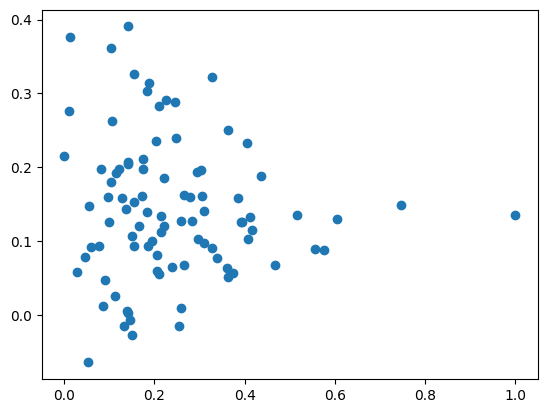

In [16]:
plt.scatter(test_labels,predicted_vqr_test_labels)

In [33]:
mae_vqr_re = mean_absolute_error(y_true=test_labels,y_pred=predicted_vqr_test_labels)
print(f'Mean absolute error for VQR with RealAmpitude ansatz :{mae_vqr_re}')
print('MSE:', mean_squared_error(test_labels, predicted_svr_test_labels))
print('RMSE:', np.sqrt(mean_squared_error(test_labels, predicted_svr_test_labels)))

Mean absolute error for VQR with RealAmpitude ansatz :0.13720005894669976
MSE: 0.03618526030174147
RMSE: 0.19022423689357112


#### Using EfficientSU2 ansatz

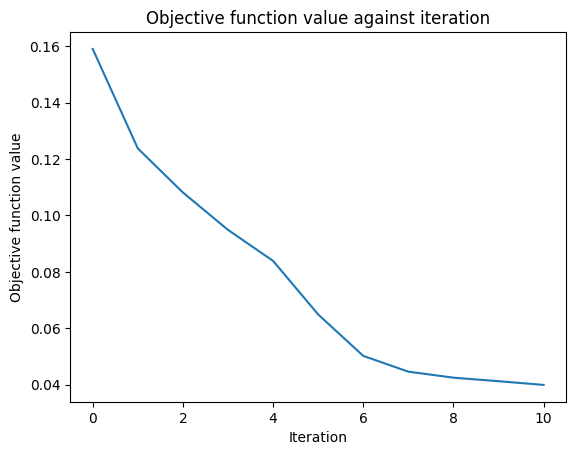

Time taken to fit using VQR : 1658.9289572238922
Time taken to get score using VQR : 2.703582525253296
Time taken to predict using VQR : 1.5318503379821777


In [18]:
feature_map = ZZFeatureMap(7,reps=1,insert_barriers='True')
ansatz = EfficientSU2(7,reps=3)
objective_func_vals = []
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=10),callback=callback_graph)

starttime = time.time()
vqr.fit(train_data,train_labels)
endtime = time.time()
print(f'Time taken to fit using VQR with EfficientSU2 : {(endtime-starttime)}')

starttime=time.time()
score = vqr.score(train_data,train_labels)
endtime=time.time()
print(f'Time taken to get score using VQR with EfficientSU2 : {(endtime-starttime)}')
print(f'score for VQR with EfficientSU2 : {score}')

starttime = time.time()
predicted_vqr_test_labels = vqr.predict(test_data)
endtime=time.time()
print(f'Time taken to predict using VQR with EfficientSU2 : {(endtime-starttime)}')

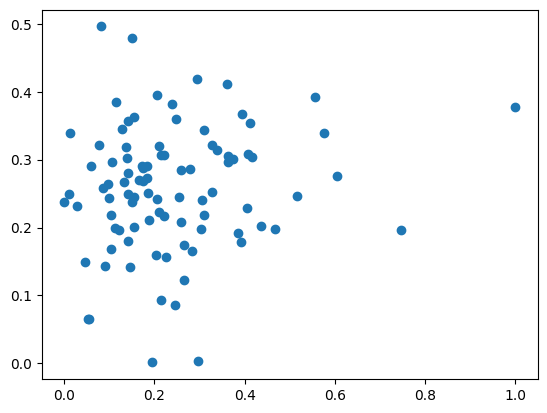

In [19]:
plt.scatter(test_labels,predicted_vqr_test_labels)

In [32]:
mae_vqr_es = mean_absolute_error(y_true=test_labels,y_pred=predicted_vqr_test_labels)
print(f'Mean absolute error for VQR with RealAmpitude ansatz :{mae_vqr_es}')
print('MSE:', mean_squared_error(test_labels, predicted_qsvr_test_labels))
print('RMSE:', np.sqrt(mean_squared_error(test_labels, predicted_qsvr_test_labels)))

Mean absolute error for VQR with RealAmpitude ansatz :0.13720005894669976
MSE: 0.03618526030174147
RMSE: 0.19022423689357112


#### Using QSVR

In [26]:
feature_map = ZZFeatureMap(7,reps=1,insert_barriers='True')

objective_func_vals = []
qsvr = QSVR()

starttime = time.time()
qsvr.fit(train_data,train_labels)
endtime = time.time()
print(f'Time taken to fit using QSVR : {(endtime-starttime)}')

starttime=time.time()
score = qsvr.score(train_data,train_labels)
endtime=time.time()
print(f'score for QSVR : {score}')
print(f'Time taken to get score using QSVR : {(endtime-starttime)}')

starttime = time.time()
predicted_qsvr_test_labels = qsvr.predict(test_data)
endtime=time.time()
print(f'Time taken to predict using QSVR : {(endtime-starttime)}')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:294: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64, copy=False)


Time taken to fit using QSVR : 184.25129389762878
Time taken to get score using QSVR : 182.3646900653839
Time taken to predict using QSVR : 338.10141682624817


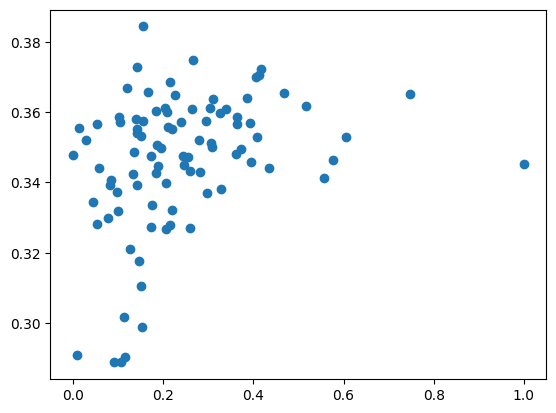

In [27]:
plt.scatter(test_labels,predicted_qsvr_test_labels)

In [36]:
mae_qsvr = mean_absolute_error(y_true=test_labels,y_pred=predicted_qsvr_test_labels)
print(f'Mean absolute error for QSVR :{mae_qsvr}')
print('MSE:', mean_squared_error(test_labels, predicted_qsvr_test_labels))
print('RMSE:', np.sqrt(mean_squared_error(test_labels, predicted_qsvr_test_labels)))
print(f'score for QSVR : {score}')

Mean absolute error for QSVR :0.15961190718328508
MSE: 0.03618526030174147
RMSE: 0.19022423689357112
score for QSVR : 0.7785863802057809
